## Quesion 1
### Import Libraries
**import libraries**
**| Arman Golbidi**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm, entropy
from sklearn.neighbors import NearestNeighbors


**Import files in to the program**

In [2]:
# Load datasets
trainSet = pd.read_csv('x.csv')
testSet = pd.read_csv('test_x.csv')

# Convert values to a flat array for further processing
trainArray = trainSet.values.flatten()
testArray = testSet.values.flatten()
trainArray

array([ 4.07211683,  4.86426917,  3.47260449,  4.04297756,  7.65229588,
        4.10382621,  3.33347793,  5.40109269,  4.84231605,  5.83126634,
        4.66297521,  4.29539847,  4.04909183,  4.44090747,  5.51002106,
        3.64179828,  4.53071715,  5.98831419,  3.5838104 ,  2.2462316 ,
        5.42562492,  3.33549836,  1.22854209,  4.07274498,  6.39898884,
        7.25890719,  5.53861266,  2.82652024,  4.51509784,  6.0586288 ,
        7.02544534,  5.57942769,  5.55813044,  6.70097225,  5.22534651,
        4.60051982,  2.45995076,  3.64896814,  1.92727543,  2.01668692,
        3.86772052,  4.2200658 ,  5.47208806, 10.        ,  4.95376178,
        2.36468405,  4.392395  ,  1.71777295,  7.69682522,  3.92559308,
        2.51763816,  6.18455833,  5.12721707,  5.8305863 ,  5.13003762,
        8.08951702,  4.89607617,  5.59405933,  2.79862427,  3.36339932,
        3.90182736,  0.        ,  4.1038285 ,  2.06571313,  5.32016641,
        4.23509459,  3.88907101,  3.99970138,  2.89906877,  3.68

***Knn density estimate function***

In [3]:
def neighborDensityEstimator(dataset, neighbors, eval_points):
    knn_model = NearestNeighbors(n_neighbors=neighbors).fit(dataset.reshape(-1, 1))
    distances, _ = knn_model.kneighbors(eval_points.reshape(-1, 1))
    radius = distances[:, -1]
    density_val = neighbors / (len(dataset) * (radius ** len(dataset.shape)))
    return density_val

***mean and std***

In [4]:
# Maximum likelihood estimation for fitting a normal distribution
mean_est, std_dev_est = norm.fit(trainArray)
print(f"Normal distribution parameters - Mean: {mean_est}, Std Dev: {std_dev_est}")

Normal distribution parameters - Mean: 4.598168200180665, Std Dev: 1.758363250053598


We will now compute the Kullback-Leibler (KL) divergence between the density estimate obtained from the k-Nearest Neighbors (KNN) method and the probability density function (PDF) of a normal distribution. This analysis will be conducted across a range of values for K, allowing us to identify the optimal value that minimizes the divergence.

In [5]:
def kl_divergence(p_val, q_val):
    return entropy(p_val, q_val)

optimal_k = None
lowest_kl_divergence = float('inf')
k_values = [5, 10, 20, 40]

for neighbors in k_values:
    knn_pdf_est = neighborDensityEstimator(trainArray, neighbors, testArray)
    normal_pdf_est = norm.pdf(testArray, mean_est, std_dev_est)
    kl_div_val = kl_divergence(knn_pdf_est, normal_pdf_est)
    print(f"KL Divergence for k = {neighbors}: {kl_div_val}")
    if kl_div_val < lowest_kl_divergence:
        lowest_kl_divergence = kl_div_val
        optimal_k = neighbors

print(f"Optimal k based on KL divergence: {optimal_k}")

KL Divergence for k = 5: 0.07882259829447953
KL Divergence for k = 10: 0.044362037281828574
KL Divergence for k = 20: 0.05117505893303747
KL Divergence for k = 40: 0.10373721488399235
Optimal k based on KL divergence: 10


## Plotting the Histogram of Training Data
The optimal value of K has been determined to be 10
Next, we will create a histogram to visualize the distribution of the training data. This graphical representation will allow us to gain insights into the dataset's characteristics, including its spread, central tendency, and any potential patterns or outliers. By examining the histogram, we can better understand how the training data is behaving and assess any underlying trends that may inform our modeling approach.

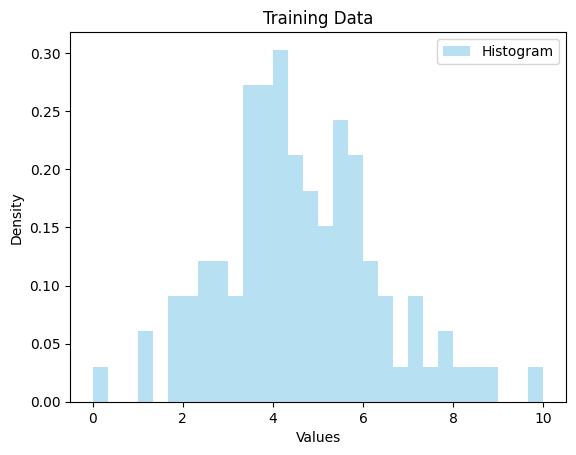

In [6]:
# Plot histogram of training data
plt.hist(trainArray, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')
plt.xlabel('Values')  # Adding labels for clarity
plt.ylabel('Density')
plt.legend()
plt.title('Training Data')
plt.show()

## normal distribution
In this step, we will visualize the probability density function (PDF) of the fitted normal distribution. This will be accomplished using the parameters that were estimated in question 1. By plotting the PDF, we can observe how well the fitted normal distribution aligns with our data. This graphical representation will help us understand the distribution of the data points and assess the accuracy of our fitted model.

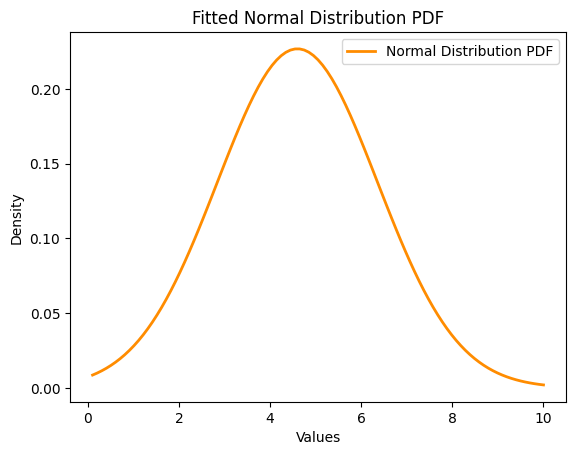

In [7]:
# Plot normal distribution PDF
normal_pdf = norm.pdf(testArray, mean_est, std_dev_est)
plt.plot(testArray, normal_pdf, label='Normal Distribution PDF', color='darkorange', linewidth=2)
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.title('Fitted Normal Distribution PDF')
plt.show()

 knn with best k

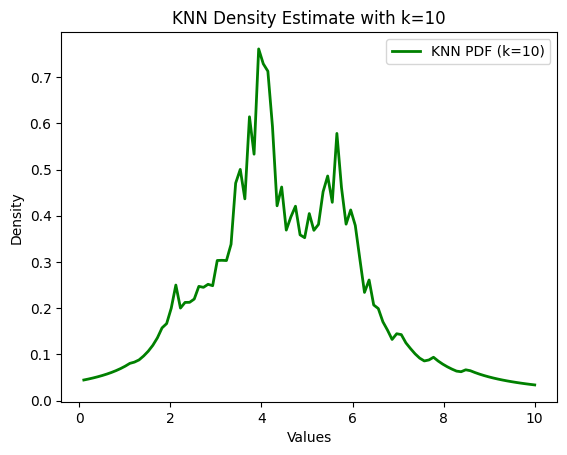

In [8]:
# Plot KNN PDF with the best k
knn_pdf_best = neighborDensityEstimator(trainArray, optimal_k, testArray)
plt.plot(testArray, knn_pdf_best, label=f'KNN PDF (k={optimal_k})', color='green', linewidth=2)
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.title(f'KNN Density Estimate with k={optimal_k}')
plt.show()

## Plotting a Probability Density Function (PDF) Using Kernel Density Estimation (KDE)

In this section, we will explore how to visualize the probability density function (PDF) of a dataset through the application of Kernel Density Estimation (KDE). KDE is a non-parametric way to estimate the probability density function of a random variable, providing a smooth curve that represents the distribution of data points.

We will cover the steps involved in creating a KDE plot, including selecting the appropriate dataset, applying the KDE algorithm, and customizing the visualization to enhance clarity and interpretation. This method is particularly useful when we want to illustrate the distribution of data points and detect patterns that might not be evident with traditional histograms. 

By the end of this guide, you will have a detailed understanding of how to effectively plot a PDF using KDE, along with examples and best practices for interpretation.

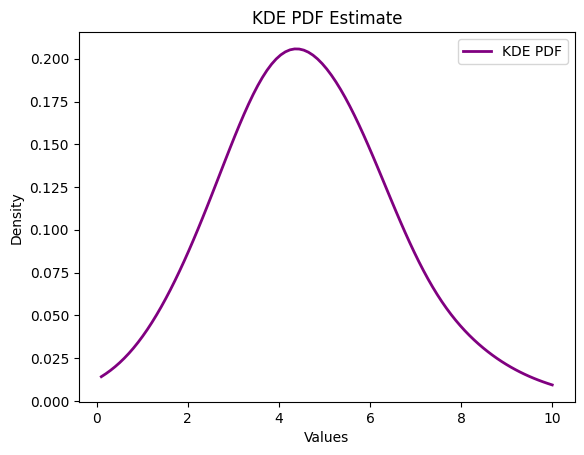

In [9]:
# KDE with bandwidth selection
kde = KernelDensity(bandwidth=1.0)
kde.fit(trainArray.reshape(-1, 1))
log_dens = kde.score_samples(testArray.reshape(-1, 1))
kde_pdf = np.exp(log_dens)
plt.plot(testArray, kde_pdf, label='KDE PDF', color='purple', linewidth=2)
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.title('KDE PDF Estimate')
plt.show()

We will create a single figure that includes several visualizations for a comprehensive comparison of data distributions:

1. **Histogram**: This will show the frequency distribution of the data, highlighting its spread and central tendency.

2. **Normal Distribution PDF**: We will overlay the normal distribution probability density function on the histogram to assess how closely our data follows a normal distribution.

3. **K-Nearest Neighbors (KNN) PDF**: The KNN PDF, using the optimal value of k, will be included to evaluate how well this model captures the data distribution.

4. **Kernel Density Estimate (KDE) PDF**: Finally, we will add the KDE PDF to provide a smooth estimate of the data’s distribution.

By combining these elements, we aim to facilitate a clear and insightful comparison of various probability density estimation methods for our dataset.

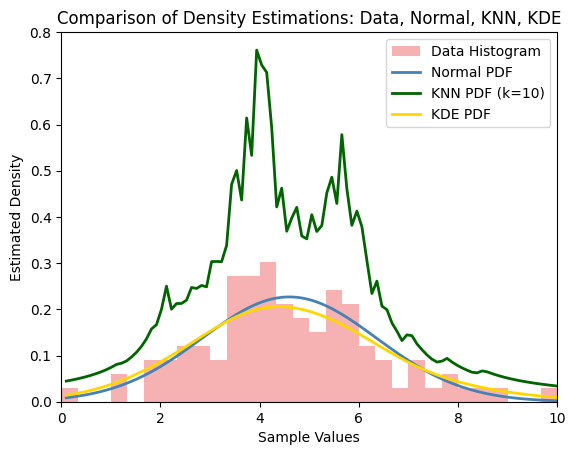

In [10]:
# Combined plot for comparison
plt.hist(trainArray, bins=30, density=True, alpha=0.6, color='lightcoral', label='Data Histogram')
plt.plot(testArray, normal_pdf, label='Normal PDF', color='steelblue', linewidth=2)
plt.plot(testArray, knn_pdf_best, label=f'KNN PDF (k={optimal_k})', color='darkgreen', linewidth=2)
plt.plot(testArray, kde_pdf, label='KDE PDF', color='gold', linewidth=2)

# Adjust x and y limits as needed
plt.xlim(0, 10)
plt.ylim(0, 0.8)

# Customizing labels and legend
plt.xlabel('Sample Values')
plt.ylabel('Estimated Density')
plt.legend(loc='upper right')  # Moving the legend to the upper right
plt.title('Comparison of Density Estimations: Data, Normal, KNN, KDE')
plt.show()
